<a href="https://colab.research.google.com/github/JayellWolfe/DS-Unit-2-Regression-Classification/blob/master/W5D2_JW_assignment_regression_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Do the [Plotly Dash](https://dash.plot.ly/) Tutorial, Parts 1 & 2.
- [ ] Add your own stretch goal(s) !

In [2]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

     |████████████████████████████████| 133kB 4.8MB/s 
     |████████████████████████████████| 7.1MB 17.0MB/s 
     |████████████████████████████████| 614kB 39.0MB/s 
     |████████████████████████████████| 225kB 39.5MB/s 
     |████████████████████████████████| 768kB 33.2MB/s 
     |████████████████████████████████| 51kB 20.5MB/s 
     |████████████████████████████████| 194kB 39.3MB/s 
     |████████████████████████████████| 737kB 42.6MB/s 
     |████████████████████████████████| 51kB 19.4MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145036 sha256=efa0572ad3282309ee260f2d65883e4e37cb20c013d5417b4cae41eb9a3c6107
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=3496a179b42d335eda0b26b72e2602252efd9e1e050fa75177f391a5045c4e33
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d7

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [0]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [0]:
#convert date to datetime     

df['created'] = pd.to_datetime(df['created'], infer_datetime_format=True)

In [0]:
#new features

df['rooms'] = df['bathrooms'] +df['bedrooms'];

In [0]:
#create amenities feature
df['amenities']= ( 
    df['hardwood_floors'] + 
    df['doorman'] + 
    df['dining_room'] + 
    df['fitness_center'] +
    df['laundry_in_unit']
)

In [0]:
#add total rooms to amenitites 

df['room_ammens'] = df['rooms'] + df['amenities']

In [48]:
#split data into train and test 

dfTrain = df[(df['created'] > '2016-4-1 01:00:00') & (df['created'] <= '2016-6-1 00:00:00')]
dfTest = df[(df['created'] > '2016-6-1 01:00:00') & (df['created'] <= '2016-7-1 00:00:00')]
dfTrain.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,rooms,amenities,room_goodies,room_ammens
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1,3.0,3.0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1,3.0,3.0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,0,5.0,5.0
5,2.0,4,2016-04-19 04:24:47,,West 18th Street,40.7429,-74.0028,7995,350 West 18th Street,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0,6.0,6.0
6,1.0,2,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,40.8012,-73.9660,3600,210 West 107th Street,low,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0,3.0,3.0


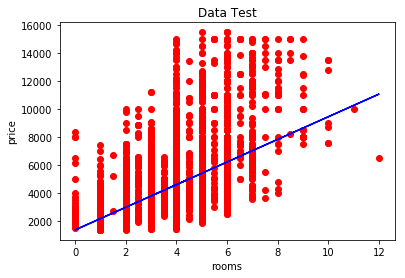

In [49]:
model1 = LR()

ammen1 = ['rooms']
targ1 = 'price'

X1 = dfTrain[ammen1]
y1 = dfTrain[targ1]

model1.fit(X1, y1)

y_predict1train = mod1.predict(X1)
y_predict1test =  mod1.predict(dfTest[ammen1])

plt.scatter(dfTest[ammen1],dfTest[targ1], color='red' )  #actual
plt.plot(dfTest[ammen1], y_predict1test, color='blue')      #predictions
plt.xlabel('rooms')
plt.ylabel('price')
plt.title("Data Test")

plt.show()

In [50]:
print("Model Coefficient:", model1.coef_[0])
print("Model y_intercept", model1.intercept_)

Model Coefficient: 809.6813826826696
Model y_intercept 1363.4860214142823


In [51]:
#Train Errors

print('The Train Mean Absolute Error is:', mean_absolute_error(y1, y_predict1train))
print('The Train Root Mean Squared Error is:', np.sqrt(mean_squared_error(y1, y_predict1train)))
print('The Train R Squared Error is:', r2_score(y1, y_predict1train))

print('')

#Test Errors

print('The Test Mean Absolute Error is:', mean_absolute_error(dfTest[ammen1], y_predict1test))
print('The Test Root Mean Squared Error is:', np.sqrt(mean_squared_error(dfTest[ammen1], y_predict1test)))
print('The Test R Squared Error is:', r2_score(dfTest[ammen1], y_predict1test))

The Train Mean Absolute Error is: 893.9571083669464
The Train Root Mean Squared Error is: 1340.9059153962985
The Train R Squared Error is: 0.42093000521396107

The Test Mean Absolute Error is: 3588.8249126101873
The Test Root Mean Squared Error is: 3765.3290901437526
The Test R Squared Error is: -7142874.165925103


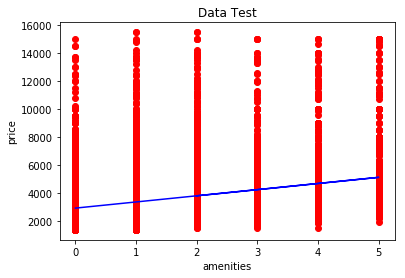

In [52]:
model2 = LR()

ammen2 = ['amenities']
targ2 = 'price'

X2 = dfTrain[ammen2]
y2 = dfTrain[targ2]

model2.fit(X2,y2)

y_predict2train = model2.predict(X2)
y_predict2test = model2.predict(dfTest[ammen2])

plt.scatter(dfTest[ammen2], dfTest[targ2], color= 'red') # actual
plt.plot(dfTest[ammen2], y_predict2test, color='blue') #predictions
plt.xlabel('amenities')
plt.ylabel('price')
plt.title('Data Test')

plt.show()

In [53]:
print("The Model Coefficient is:",  model2.coef_[0])
print("The Model y-intercept is:", model2.intercept_)

The Model Coefficient is: 439.85337392417205
The Model y-intercept is: 2933.7667150441366


In [46]:
#Train Errors

print("The Train Mean Absolute Error is;", mean_absolute_error(y2, y_predict2train))
print("The Train Root Mean Squared Error:", np.sqrt(mean_squared_error(y2, y_predict2train)))
print("The R Squared Error is:", r2_score(y2, y_predict2train))

print("")

#Test Errors
print("The Test Mean Absolute Error is;", mean_absolute_error(dfTest[ammen2], y_predict2test))
print("The Test Root Mean Squared Error is:", np.sqrt(mean_squared_error(dfTest[ammen2], y_predict2test)))
print("Test R Squared Error is:", r2_score(dfTest[ammen2], y_predict2test))                               

The Train Mean Absolute Error is; 1128.3601745044234
The Train Root Mean Squared Error: 1656.1515977808672
The R Squared Error is: 0.11664631611789378

The Test Mean Absolute Error is; 3562.9200260496673
The Test Root Mean Squared Error is: 3614.660226245644
Test R Squared Error is: -6775909.830247786


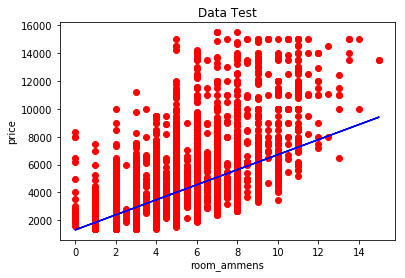

In [54]:
model3 = LR()

ammen3 = ['room_ammens']
targ3 = 'price'

X3 = dfTrain[ammen3]
y3 = dfTrain[targ3]

model3.fit(X3, y3)

y_predict3train = model3.predict(X3)
y_predict3test = model3.predict(dfTest[ammen3])

plt.scatter(dfTest[ammen3], dfTest[targ3], color= 'red')  #actual
plt.plot(dfTest[ammen3], y_predict3test, color='blue')    #predicitions
plt.xlabel('room_ammens')
plt.ylabel('price')
plt.title('Data Test')

plt.show()

In [55]:
print('The Model Coefficient is:', model3.coef_[0])
print("The Model y_intercept is:", model3.intercept_)

The Model Coefficient is: 539.8611635022778
The Model y_intercept is: 1312.8882728382027


In [57]:
#Train Errors

print('The Train Mean Absolute Error is: ', mean_absolute_error(y3,y_predict3train))
print('The Train Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y3,y_predict3train)))
print('The Train R Squared Error is: ', r2_score(y3,y_predict3train))

print('')

#Test Errors 
print('Test Mean Absolute Error is: ', mean_absolute_error(dfTest[ammen3],y_predict3test))
print('Test Root Mean Squared Error is: ', np.sqrt(mean_squared_error(dfTest[ammen3],y_predict3test)))
print('Test R Squared Error is: ', r2_score(dfTest[ammen3],y_predict3test))

The Train Mean Absolute Error is:  892.7035325259549
The Train Root Mean Squared Error is:  1337.5487029288554
The Train R Squared Error is:  0.4238259986179206

Test Mean Absolute Error is:  3568.260194397153
Test Root Mean Squared Error is:  3748.8086777756657
Test R Squared Error is:  -3088938.0184500082
